In [1]:
from datascience import *
import numpy as np
import matplotlib as mpl
%matplotlib inline

# Comparisons

In [49]:
1 > 2 

False

In [50]:
1 < 2

True

In [51]:
1 == 2

False

In [54]:
num = 1
num2 = 2
num == 1

True

In [55]:
make_array(1,2,3,4) > 2

array([False, False,  True,  True])

# Functions

In [5]:
def double(y):
    '''
    Doubles the value of x
    
    x: numeric, number you want to double
    '''
    
    return 2*y

In [6]:
double(4)

8

In [7]:
y

NameError: name 'y' is not defined

In [3]:
double(2)

4

In [4]:
x = 5

In [8]:
def area_of_rectangle(s1, s2):
    '''
    Calculates the area of a rectangle
    
    s1,s2: numeric, sides of rectangle
    '''
    
    return s1*s2

In [9]:
area_of_rectangle(4,5)

20

In [16]:
def area_of_circle(r = 1):
    '''
    Finds area of circle
    '''
    output = np.pi*r**2
    return output

In [17]:
area_of_circle(make_array(1,2,3,4,5))

array([ 3.14159265, 12.56637061, 28.27433388, 50.26548246, 78.53981634])

In [18]:
area_of_circle(3)

28.274333882308138

In [19]:
area_of_circle()

3.141592653589793

In [20]:
area_of_circle(1)

3.141592653589793

In [21]:
counties = Table.read_table('counties.csv')

In [22]:
counties.show(5)

SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,INTERNATIONALMIG2010,INTERNATIONALMIG2011,INTERNATIONALMIG2012,INTERNATIONALMIG2013,INTERNATIONALMIG2014,DOMESTICMIG2010,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,NETMIG2010,NETMIG2011,NETMIG2012,NETMIG2013,NETMIG2014,RESIDUAL2010,RESIDUAL2011,RESIDUAL2012,RESIDUAL2013,RESIDUAL2014,GQESTIMATESBASE2010,GQESTIMATES2010,GQESTIMATES2011,GQESTIMATES2012,GQESTIMATES2013,GQESTIMATES2014,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785822,4801695,4817484,4833996,4849377,5695,15873,15789,16512,15381,14966,59691,59066,58036,58059,11097,48810,48380,49746,49793,3869,10881,10686,8290,8266,1352,4949,5626,5626,5606,489,-98,-810,1913,2034,1841,4851,4816,7539,7640,-15,141,287,683,-525,116185,116211,115491,115691,117165,118470,12.4518,12.2809,12.0263,11.9915,10.182,10.0591,10.3085,10.2842,2.26983,2.22181,1.71787,1.70726,1.03238,1.16975,1.16583,1.15786,-0.0204432,-0.168414,0.396416,0.420102,1.01194,1.00133,1.56225,1.57796
50,3,6,1,1,Alabama,Autauga County,54571,54571,54684,55275,55192,55136,55395,113,591,-83,-56,259,171,636,615,593,618,152,505,563,535,492,19,131,52,58,126,33,16,12,12,11,52,398,-155,-161,129,85,414,-143,-149,140,9,46,8,35,-7,455,455,455,455,455,455,11.5679,11.1345,10.7498,11.1824,9.18524,10.1931,9.69835,8.90248,2.38271,0.941458,1.05141,2.2799,0.291018,0.217259,0.217533,0.199039,7.23906,-2.80627,-2.91857,2.33419,7.53008,-2.58901,-2.70104,2.53323
50,3,6,1,3,Alabama,Baldwin County,182265,182265,183216,186694,190561,195443,200111,951,3478,3867,4882,4668,548,2187,2093,2162,2169,537,1819,1884,1912,1947,11,368,209,250,222,67,247,269,284,283,851,2692,3364,4244,3779,918,2939,3633,4528,4062,22,171,25,104,384,2307,2307,2262,2244,2297,2296,11.8245,11.0959,11.202,10.9669,9.83482,9.98794,9.90663,9.84442,1.98967,1.108,1.29532,1.12248,1.33546,1.42609,1.47149,1.4309,14.5549,17.8341,21.9894,19.1074,15.8904,19.2602,23.4609,20.5383
50,3,6,1,5,Alabama,Barbour County,27457,27457,27336,27225,27169,26978,26887,-121,-111,-56,-191,-91,69,334,300,263,285,131,320,291,285,307,-62,14,9,-22,-22,2,4,-1,-1,1,-64,-130,-65,-190,-60,-62,-126,-66,-191,-59,3,1,1,22,-10,3193,3193,3382,3389,3390,3402,12.2432,11.0306,9.7143,10.582,11.73,10.6997,10.5269,11.3989,0.513187,0.330919,-0.812603,-0.816857,0.146625,-0.0367688,-0.0369365,0.0371299,-4.76531,-2.38997,-7.01793,-2.22779,-4.61868,-2.42674,-7.05487,-2.19066
50,3,6,1,7,Alabama,Bibb County,22915,22919,22879,22740,22634,22504,22506,-40,-139,-106,-130,2,57,266,245,250,243,28,278,238,229,227,29,-12,7,21,16,2,1,0,3,3,-69,-128,-113,-152,-8,-67,-127,-113,-149,-5,-2,0,0,-2,-9,2224,2224,2224,2225,2224,2224,11.6618,10.7991,11.0771,10.7976,12.1879,10.4906,10.1467,10.0866,-0.526097,0.308547,0.93048,0.710953,0.0438414,0,0.132926,0.133304,-5.6117,-4.98083,-6.7349,-0.355477,-5.56786,-4.98083,-6.60198,-0.222173


In [23]:
counties.labels

('SUMLEV',
 'REGION',
 'DIVISION',
 'STATE',
 'COUNTY',
 'STNAME',
 'CTYNAME',
 'CENSUS2010POP',
 'ESTIMATESBASE2010',
 'POPESTIMATE2010',
 'POPESTIMATE2011',
 'POPESTIMATE2012',
 'POPESTIMATE2013',
 'POPESTIMATE2014',
 'NPOPCHG_2010',
 'NPOPCHG_2011',
 'NPOPCHG_2012',
 'NPOPCHG_2013',
 'NPOPCHG_2014',
 'BIRTHS2010',
 'BIRTHS2011',
 'BIRTHS2012',
 'BIRTHS2013',
 'BIRTHS2014',
 'DEATHS2010',
 'DEATHS2011',
 'DEATHS2012',
 'DEATHS2013',
 'DEATHS2014',
 'NATURALINC2010',
 'NATURALINC2011',
 'NATURALINC2012',
 'NATURALINC2013',
 'NATURALINC2014',
 'INTERNATIONALMIG2010',
 'INTERNATIONALMIG2011',
 'INTERNATIONALMIG2012',
 'INTERNATIONALMIG2013',
 'INTERNATIONALMIG2014',
 'DOMESTICMIG2010',
 'DOMESTICMIG2011',
 'DOMESTICMIG2012',
 'DOMESTICMIG2013',
 'DOMESTICMIG2014',
 'NETMIG2010',
 'NETMIG2011',
 'NETMIG2012',
 'NETMIG2013',
 'NETMIG2014',
 'RESIDUAL2010',
 'RESIDUAL2011',
 'RESIDUAL2012',
 'RESIDUAL2013',
 'RESIDUAL2014',
 'GQESTIMATESBASE2010',
 'GQESTIMATES2010',
 'GQESTIMATES2011',
 '

In [24]:
counties.group('STNAME')

STNAME,count
Alabama,68
Alaska,30
Arizona,16
Arkansas,76
California,59
Colorado,65
Connecticut,9
Delaware,4
District of Columbia,2
Florida,68


In [27]:
def higher_pop(x, y):
    return max(x,y)

In [28]:
counties.apply(higher_pop,'POPESTIMATE2013', 'POPESTIMATE2014')

array([4849377,   55395,  200111, ...,   21031,    8450,    7201])

In [29]:
counties['higher_13_14'] = counties.apply(higher_pop,'POPESTIMATE2013', 'POPESTIMATE2014')

In [30]:
counties.show(5)

SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,INTERNATIONALMIG2010,INTERNATIONALMIG2011,INTERNATIONALMIG2012,INTERNATIONALMIG2013,INTERNATIONALMIG2014,DOMESTICMIG2010,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,NETMIG2010,NETMIG2011,NETMIG2012,NETMIG2013,NETMIG2014,RESIDUAL2010,RESIDUAL2011,RESIDUAL2012,RESIDUAL2013,RESIDUAL2014,GQESTIMATESBASE2010,GQESTIMATES2010,GQESTIMATES2011,GQESTIMATES2012,GQESTIMATES2013,GQESTIMATES2014,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,higher_13_14
40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785822,4801695,4817484,4833996,4849377,5695,15873,15789,16512,15381,14966,59691,59066,58036,58059,11097,48810,48380,49746,49793,3869,10881,10686,8290,8266,1352,4949,5626,5626,5606,489,-98,-810,1913,2034,1841,4851,4816,7539,7640,-15,141,287,683,-525,116185,116211,115491,115691,117165,118470,12.4518,12.2809,12.0263,11.9915,10.182,10.0591,10.3085,10.2842,2.26983,2.22181,1.71787,1.70726,1.03238,1.16975,1.16583,1.15786,-0.0204432,-0.168414,0.396416,0.420102,1.01194,1.00133,1.56225,1.57796,4849377
50,3,6,1,1,Alabama,Autauga County,54571,54571,54684,55275,55192,55136,55395,113,591,-83,-56,259,171,636,615,593,618,152,505,563,535,492,19,131,52,58,126,33,16,12,12,11,52,398,-155,-161,129,85,414,-143,-149,140,9,46,8,35,-7,455,455,455,455,455,455,11.5679,11.1345,10.7498,11.1824,9.18524,10.1931,9.69835,8.90248,2.38271,0.941458,1.05141,2.2799,0.291018,0.217259,0.217533,0.199039,7.23906,-2.80627,-2.91857,2.33419,7.53008,-2.58901,-2.70104,2.53323,55395
50,3,6,1,3,Alabama,Baldwin County,182265,182265,183216,186694,190561,195443,200111,951,3478,3867,4882,4668,548,2187,2093,2162,2169,537,1819,1884,1912,1947,11,368,209,250,222,67,247,269,284,283,851,2692,3364,4244,3779,918,2939,3633,4528,4062,22,171,25,104,384,2307,2307,2262,2244,2297,2296,11.8245,11.0959,11.202,10.9669,9.83482,9.98794,9.90663,9.84442,1.98967,1.108,1.29532,1.12248,1.33546,1.42609,1.47149,1.4309,14.5549,17.8341,21.9894,19.1074,15.8904,19.2602,23.4609,20.5383,200111
50,3,6,1,5,Alabama,Barbour County,27457,27457,27336,27225,27169,26978,26887,-121,-111,-56,-191,-91,69,334,300,263,285,131,320,291,285,307,-62,14,9,-22,-22,2,4,-1,-1,1,-64,-130,-65,-190,-60,-62,-126,-66,-191,-59,3,1,1,22,-10,3193,3193,3382,3389,3390,3402,12.2432,11.0306,9.7143,10.582,11.73,10.6997,10.5269,11.3989,0.513187,0.330919,-0.812603,-0.816857,0.146625,-0.0367688,-0.0369365,0.0371299,-4.76531,-2.38997,-7.01793,-2.22779,-4.61868,-2.42674,-7.05487,-2.19066,26978
50,3,6,1,7,Alabama,Bibb County,22915,22919,22879,22740,22634,22504,22506,-40,-139,-106,-130,2,57,266,245,250,243,28,278,238,229,227,29,-12,7,21,16,2,1,0,3,3,-69,-128,-113,-152,-8,-67,-127,-113,-149,-5,-2,0,0,-2,-9,2224,2224,2224,2225,2224,2224,11.6618,10.7991,11.0771,10.7976,12.1879,10.4906,10.1467,10.0866,-0.526097,0.308547,0.93048,0.710953,0.0438414,0,0.132926,0.133304,-5.6117,-4.98083,-6.7349,-0.355477,-5.56786,-4.98083,-6.60198,-0.222173,22506


#### Question: Which county had the greatest change in population from 2010 to 2011?

In [32]:
a = counties.apply(abs, 'NPOPCHG_2011')

In [33]:
max(a)

411760

In [37]:
counties.select('CTYNAME','NPOPCHG_2011').sort('NPOPCHG_2011', descending = True)

CTYNAME,NPOPCHG_2011
Texas,411760
California,365890
Florida,255680
New York,120878
Georgia,98737
North Carolina,92014
Virginia,84812
Washington,80201
Harris County,73039
Miami-Dade County,71227


In [38]:
counties['abs_change_11'] = counties.apply(abs, 'NPOPCHG_2011')

In [39]:
counties.select('CTYNAME','abs_change_11').sort('abs_change_11', descending = True)

CTYNAME,abs_change_11
Texas,411760
California,365890
Florida,255680
New York,120878
Georgia,98737
North Carolina,92014
Virginia,84812
Washington,80201
Harris County,73039
Miami-Dade County,71227


#### Question: What was the percent change in estimated population for each county between 2011 and 2012?

In [43]:
cty_sub = counties.select('POPESTIMATE2011', 'POPESTIMATE2012', 'NPOPCHG_2012')
cty_sub

POPESTIMATE2011,POPESTIMATE2012,NPOPCHG_2012
4801695,4817484,15789
55275,55192,-83
186694,190561,3867
27225,27169,-56
22740,22634,-106
57694,57748,54
10623,10589,-34
20676,20409,-267
117760,117264,-496
34004,34087,83


In [45]:
def percent_change(a, b):
    out = (b-a)/a * 100
    return out

In [47]:
cty_sub['pct_chg_12'] = cty_sub.apply(percent_change, 'POPESTIMATE2011','POPESTIMATE2012')

In [48]:
cty_sub.show(5)

POPESTIMATE2011,POPESTIMATE2012,NPOPCHG_2012,pct_chg_12
4801695,4817484,15789,0.328821
55275,55192,-83,-0.150158
186694,190561,3867,2.0713
27225,27169,-56,-0.205693
22740,22634,-106,-0.466139


In [56]:
counties['above_mil_2013'] = counties.column('POPESTIMATE2013') > 1000000

In [57]:
counties.show(5)

SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,INTERNATIONALMIG2010,INTERNATIONALMIG2011,INTERNATIONALMIG2012,INTERNATIONALMIG2013,INTERNATIONALMIG2014,DOMESTICMIG2010,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,NETMIG2010,NETMIG2011,NETMIG2012,NETMIG2013,NETMIG2014,RESIDUAL2010,RESIDUAL2011,RESIDUAL2012,RESIDUAL2013,RESIDUAL2014,GQESTIMATESBASE2010,GQESTIMATES2010,GQESTIMATES2011,GQESTIMATES2012,GQESTIMATES2013,GQESTIMATES2014,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,higher_13_14,abs_change_11,above_mil_2013
40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785822,4801695,4817484,4833996,4849377,5695,15873,15789,16512,15381,14966,59691,59066,58036,58059,11097,48810,48380,49746,49793,3869,10881,10686,8290,8266,1352,4949,5626,5626,5606,489,-98,-810,1913,2034,1841,4851,4816,7539,7640,-15,141,287,683,-525,116185,116211,115491,115691,117165,118470,12.4518,12.2809,12.0263,11.9915,10.182,10.0591,10.3085,10.2842,2.26983,2.22181,1.71787,1.70726,1.03238,1.16975,1.16583,1.15786,-0.0204432,-0.168414,0.396416,0.420102,1.01194,1.00133,1.56225,1.57796,4849377,15873,True
50,3,6,1,1,Alabama,Autauga County,54571,54571,54684,55275,55192,55136,55395,113,591,-83,-56,259,171,636,615,593,618,152,505,563,535,492,19,131,52,58,126,33,16,12,12,11,52,398,-155,-161,129,85,414,-143,-149,140,9,46,8,35,-7,455,455,455,455,455,455,11.5679,11.1345,10.7498,11.1824,9.18524,10.1931,9.69835,8.90248,2.38271,0.941458,1.05141,2.2799,0.291018,0.217259,0.217533,0.199039,7.23906,-2.80627,-2.91857,2.33419,7.53008,-2.58901,-2.70104,2.53323,55395,591,False
50,3,6,1,3,Alabama,Baldwin County,182265,182265,183216,186694,190561,195443,200111,951,3478,3867,4882,4668,548,2187,2093,2162,2169,537,1819,1884,1912,1947,11,368,209,250,222,67,247,269,284,283,851,2692,3364,4244,3779,918,2939,3633,4528,4062,22,171,25,104,384,2307,2307,2262,2244,2297,2296,11.8245,11.0959,11.202,10.9669,9.83482,9.98794,9.90663,9.84442,1.98967,1.108,1.29532,1.12248,1.33546,1.42609,1.47149,1.4309,14.5549,17.8341,21.9894,19.1074,15.8904,19.2602,23.4609,20.5383,200111,3478,False
50,3,6,1,5,Alabama,Barbour County,27457,27457,27336,27225,27169,26978,26887,-121,-111,-56,-191,-91,69,334,300,263,285,131,320,291,285,307,-62,14,9,-22,-22,2,4,-1,-1,1,-64,-130,-65,-190,-60,-62,-126,-66,-191,-59,3,1,1,22,-10,3193,3193,3382,3389,3390,3402,12.2432,11.0306,9.7143,10.582,11.73,10.6997,10.5269,11.3989,0.513187,0.330919,-0.812603,-0.816857,0.146625,-0.0367688,-0.0369365,0.0371299,-4.76531,-2.38997,-7.01793,-2.22779,-4.61868,-2.42674,-7.05487,-2.19066,26978,111,False
50,3,6,1,7,Alabama,Bibb County,22915,22919,22879,22740,22634,22504,22506,-40,-139,-106,-130,2,57,266,245,250,243,28,278,238,229,227,29,-12,7,21,16,2,1,0,3,3,-69,-128,-113,-152,-8,-67,-127,-113,-149,-5,-2,0,0,-2,-9,2224,2224,2224,2225,2224,2224,11.6618,10.7991,11.0771,10.7976,12.1879,10.4906,10.1467,10.0866,-0.526097,0.308547,0.93048,0.710953,0.0438414,0,0.132926,0.133304,-5.6117,-4.98083,-6.7349,-0.355477,-5.56786,-4.98083,-6.60198,-0.222173,22506,139,False


#### Question: Which counties had the greatest change in population between 2013 and 2014?

## Finding Percentages

In [58]:
cah = Table.read_table('201709-CAH_PulseOfTheNation.csv')

In [59]:
cah.labels

('Income',
 'Gender',
 'Age',
 'Age Range',
 'Political Affiliation',
 'Do you approve or disapprove of how Donald Trump is handling his job as president?',
 'What is your highest level of education? ',
 'What is your race?',
 'What is your marital status?',
 'What would you say is the likelihood that your current job will be entirely performed by robots or computers within the next decade?',
 'Do you believe that climate change is real and caused by people, real but not caused by people, or not real at all?',
 'How many Transformers movies have you seen? ',
 'Do you agree or disagree with the following statement: scientists are generally honest and are serving the public good. ',
 'Do you agree or disagree with the following statement: vaccines are safe and protect children from disease.',
 'How many books, if any, have you read in the past year?',
 'Do you believe in ghosts?',
 'What percentage of the federal budget would you estimate is spent on scientific research?',
 'Is federal f

In [60]:
cah_new = cah.relabeled('What is your highest level of education? ', 'Education Level').select('Education Level', 'Age Range','Income')

In [61]:
cah_new.show(5)

Education Level,Age Range,Income
High school,55-64,68000
Some college,55-64,46000
High school,45-54,51000
Some college,55-64,54000
College degree,55-64,83000


In [62]:
cah_new.pivot('Education Level', 'Age Range')

Age Range,College degree,Graduate degree,High school,Other,Some college
18-24,2,0,5,0,2
25-34,7,2,3,0,3
35-44,18,13,7,0,3
45-54,34,30,12,3,25
55-64,36,20,19,2,23
65+,9,15,8,0,9


In [63]:
age_educ_table = cah_new.pivot('Education Level', 'Age Range').select('Age Range', 'Graduate degree', 'College degree', 'Some college', 'High school', 'Other')

In [71]:
nums = make_array(1,2,3,4)

In [72]:
2**nums

array([ 2,  4,  8, 16])

In [64]:
age_educ_table

Age Range,Graduate degree,College degree,Some college,High school,Other
18-24,0,2,2,5,0
25-34,2,7,3,3,0
35-44,13,18,3,7,0
45-54,30,34,25,12,3
55-64,20,36,23,19,2
65+,15,9,9,8,0


In [65]:
def row_props(a, b, c, d, e):
    overall = a + b + c + d + e
    return make_array(a/overall, b/overall, c/overall, d/overall, e/overall)

In [67]:
age_educ_table.apply(row_props, 'Graduate degree', 'College degree', 'Some college', 'High school', 'Other')

array([[0.        , 0.22222222, 0.22222222, 0.55555556, 0.        ],
       [0.13333333, 0.46666667, 0.2       , 0.2       , 0.        ],
       [0.31707317, 0.43902439, 0.07317073, 0.17073171, 0.        ],
       [0.28846154, 0.32692308, 0.24038462, 0.11538462, 0.02884615],
       [0.2       , 0.36      , 0.23      , 0.19      , 0.02      ],
       [0.36585366, 0.2195122 , 0.2195122 , 0.19512195, 0.        ]])

In [68]:
income_age_educ = cah_new.pivot('Education Level', 
                                'Age Range', 
                                values = 'Income', 
                                collect = np.mean).select('Age Range', 'Graduate degree', 'College degree', 'Some college', 'High school', 'Other')
income_age_educ

Age Range,Graduate degree,College degree,Some college,High school,Other
18-24,0,43500,108500,50000,0
25-34,53000,93285.7,71000,81333.3,0
35-44,179769,80944.4,108667,59571.4,0
45-54,126767,134676,87080,71500,36000
55-64,91250,100139,78434.8,54947.4,123000
65+,124267,81888.9,52000,57750,0


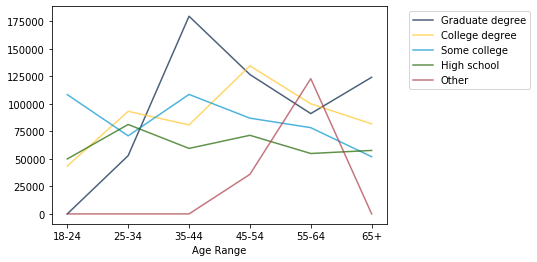

In [69]:
income_age_educ.plot('Age Range')